In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
%matplotlib inline

# Распределение Рэлея
### (Версия для Python 3)

* Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Выбрано: Распределение Рэлея.
Как известно, распределение Рэлея является частным случаем распределения Хи-квадрат со степенями свободы *df=2* и параметром масштаба (_σ_) равным 1.
Пусть в рассматриваемом примере *σ=5*.

In [2]:
scale = 5
size = 1000

rayleigh_rv = sts.rayleigh(loc=0, scale=scale)
mean = rayleigh_rv.stats()[0]
print(mean)
vals = rayleigh_rv.ppf([0.001, 0.5, 0.999])
assert np.allclose([0.001, 0.5, 0.999], rayleigh_rv.cdf(vals))

6.2665706865775


* Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

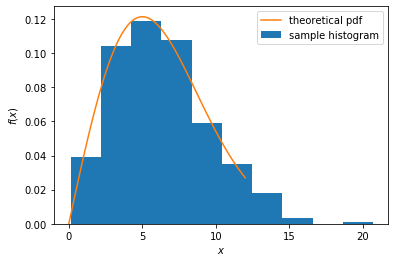

In [3]:
sample_rayleigh = rayleigh_rv.rvs(size=size)

x = np.linspace(0,12,100)

pdf = rayleigh_rv.pdf(x)
plt.hist(sample_rayleigh, density=True, label='sample histogram')

plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()


* Для нескольких значений _n_ (например, 5, 10, 50) сгенерируйте 1000 (*size*) выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

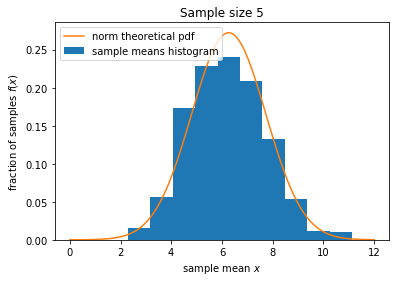

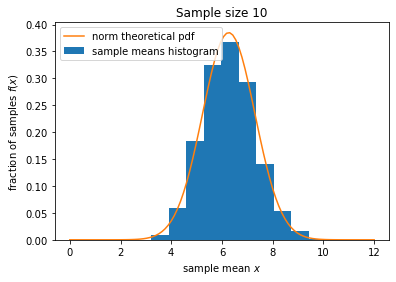

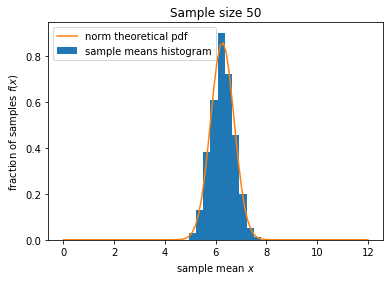

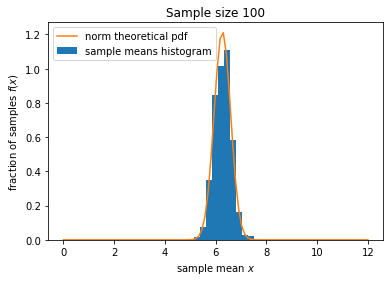

In [4]:
for n in [5, 10, 50, 100]:
    sample_means = []
    for rvn in range(size):
        means = rayleigh_rv.rvs(size=n).mean()
        sample_means.append(means)

    plt.hist(sample_means, density=True, label='sample means histogram')

    # вычислим pdf нормального распределения
    norm_rv = sts.norm((math.pi / 2) ** .5 * scale, ((2 - math.pi / 2) / n * scale ** 2) ** .5)
    x = np.linspace(0, 12, 100)
    pdf = norm_rv.pdf(x)

    plt.plot(x, pdf, label='norm theoretical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

# Выводы

Как видно из построенных графиков, при увеличении размера выборки (_n_), распределение средних значений начинает
сходиться к mean (~6.267), среднеквадратичное отклонение убывает.

Таким образом, при увеличении *n* точность
апроксимации растет.
